# #66DaysofData Hashtag-Analysis (WIP)

### Questions
- How many total tweets?
- How many unique participants?
- How many tweets per day?
- Day with most tweets / Day with least tweets
- Who was the most active user?
- How likely is that a participant finished with the challenge? 

In [83]:
# inputs
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import date, time

In [84]:
df = pd.read_csv('finalFrame.csv')

In [85]:
df

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1299601482749181952,1292469347370360839,DuckPython,2020-08-29 06:55:13+00:00,@KenJee_DS looking forward to #66DaysOfData,0,1
1,1299734773456203777,1159830350102781953,KenJee_DS,2020-08-29 15:44:52+00:00,Very excited to announce the #66daysofdata ini...,51,269
2,1299735515923505153,719854244,Sachin_g_here,2020-08-29 15:47:49+00:00,@KenJee_DS Looking fwd to #66Daysofdata,0,1
3,1299735809004769282,1001046433695285249,gautham53814486,2020-08-29 15:48:59+00:00,Let’s start #66daysofdata https://t.co/IPm1WhHaHB,0,2
4,1299736210575769605,1652520728,khudiamayankino,2020-08-29 15:50:35+00:00,@KenJee_DS count me in #66daysofdata,0,1
...,...,...,...,...,...,...,...
16205,1375299630607441924,822280007502295041,_paulo_lopez_,2021-03-26 04:12:38+00:00,#100DaysOfMLCode #100DaysOfCode #66daysofdata ...,14,4
16206,1375342490266443779,209191879,bhatnagarkush,2021-03-26 07:02:56+00:00,Day 57: Learned about different Python scikit-...,0,1
16207,1375350266392875008,397272525,shatandv,2021-03-26 07:33:50+00:00,Day 80 of #66DaysOfData:\n- Understood more ab...,0,2
16208,1375352459401437186,1346312420780752896,Comet_Miller,2021-03-26 07:42:33+00:00,Day 53 of #66DaysOfData \n\nStatistics:\nGot t...,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    16210 non-null  int64 
 1   user_id     16210 non-null  int64 
 2   user_name   16210 non-null  object
 3   created_at  16210 non-null  object
 4   full_text   16210 non-null  object
 5   retweets    16210 non-null  int64 
 6   favorite    16210 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 886.6+ KB


In [87]:
# check duplicats
df.duplicated('full_text').sum()

2029

In [88]:
df[df.duplicated(['full_text'])]

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
98,1300599209893208064,1300469935760650240,JennAckerman3,2020-09-01 00:59:50+00:00,Day 0 #66daysofdata : Started part 6 of \n@Ken...,0,5
100,1300629916560453632,1253326201352974337,MythBus51085985,2020-09-01 03:01:51+00:00,Day 01:\nWorking on to deploy a machine learni...,1,5
102,1300639179957661697,1344925334,togononrenz,2020-09-01 03:38:39+00:00,Joining #66daysofdata! I keep a personal diary...,0,4
104,1300639727452934147,928013573321838592,KietPhan_,2020-09-01 03:40:50+00:00,Day 1 of 66. Today I’m fully committed to @Ken...,1,6
106,1300643041938518016,628182698,FelixNicholasW,2020-09-01 03:54:00+00:00,Starting my day 1 of #66DaysOfData !! I'll sta...,0,0
...,...,...,...,...,...,...,...
16135,1374560984858300418,1208077315747528704,SiphuLangeni,2021-03-24 03:17:31+00:00,"Day 82: Data must be correct, consistent, usab...",20,16
16137,1374578995119988736,63557338,egm_photo,2021-03-24 04:29:05+00:00,Day 79 of #66DaysOfData with @KenJee_DS \n\nMo...,0,8
16139,1374596222917349379,1266599735881687040,ChinWuChen1,2021-03-24 05:37:32+00:00,D16 #66daysofdata \n- completed Kaggle's NLP m...,0,1
16141,1374602673568186368,1346312420780752896,Comet_Miller,2021-03-24 06:03:10+00:00,Day 51 of #66DaysOfData \n\nIt's been two week...,0,2


In [89]:
df = df.sort_values('created_at').drop_duplicates(subset=['full_text'], keep='last')

In [90]:
# check duplicats again, should now be 0
df.duplicated('full_text').sum()

0

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14181 entries, 0 to 16209
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    14181 non-null  int64 
 1   user_id     14181 non-null  int64 
 2   user_name   14181 non-null  object
 3   created_at  14181 non-null  object
 4   full_text   14181 non-null  object
 5   retweets    14181 non-null  int64 
 6   favorite    14181 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 886.3+ KB


In [92]:
# split the `created_at` column into date and time to make aggreation over days possible 
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = [d.date() for d in df['created_at']]
df['time'] = [d.time() for d in df['created_at']]
df.drop(['created_at'], 1, inplace=True)

In [93]:
df

,tweet_id,user_id,user_name,full_text,retweets,favorite,date,time
0,1299601482749181952,1292469347370360839,DuckPython,@KenJee_DS looking forward to #66DaysOfData,0,1,2020-08-29,06:55:13
1,1299734773456203777,1159830350102781953,KenJee_DS,Very excited to announce the #66daysofdata ini...,51,269,2020-08-29,15:44:52
2,1299735515923505153,719854244,Sachin_g_here,@KenJee_DS Looking fwd to #66Daysofdata,0,1,2020-08-29,15:47:49
3,1299735809004769282,1001046433695285249,gautham53814486,Let’s start #66daysofdata https://t.co/IPm1WhHaHB,0,2,2020-08-29,15:48:59
4,1299736210575769605,1652520728,khudiamayankino,@KenJee_DS count me in #66daysofdata,0,1,2020-08-29,15:50:35
...,...,...,...,...,...,...,...,...
16205,1375299630607441924,822280007502295041,_paulo_lopez_,#100DaysOfMLCode #100DaysOfCode #66daysofdata ...,14,4,2021-03-26,04:12:38
16206,1375342490266443779,209191879,bhatnagarkush,Day 57: Learned about different Python scikit-...,0,1,2021-03-26,07:02:56
16207,1375350266392875008,397272525,shatandv,Day 80 of #66DaysOfData:\n- Understood more ab...,0,2,2021-03-26,07:33:50
16208,1375352459401437186,1346312420780752896,Comet_Miller,Day 53 of #66DaysOfData \n\nStatistics:\nGot t...,0,0,2021-03-26,07:42:33


In [94]:
# group by date and count number of tweets on that day
countTweetsDay = df.groupby(['date']).count()['tweet_id']
countTweetsDay = pd.DataFrame(countTweetsDay)
countTweetsDay.rename(columns={'tweet_id': 'count'}, inplace=True)

In [95]:
countTweetsDay

,count
date,
2020-08-29,28
2020-08-30,27
2020-08-31,42
2020-09-01,141
2020-09-02,165
...,...
2021-03-22,46
2021-03-23,40
2021-03-24,31


In [96]:
# how many individual participants?
df['user_id'].nunique()

779

In [97]:
# basic statistics about the tweets per day
print('mean: ' + str(countTweetsDay['count'].mean()))
print('median: ' + str(countTweetsDay['count'].median()))
print('max: ' + str(countTweetsDay['count'].max()))
print('min: ' + str(countTweetsDay['count'].min()))

mean: 67.85167464114832
median: 69.0
max: 165
min: 8


In [98]:
# get day with most and least tweets
countTweetsDay[countTweetsDay['count']==165]

,count
date,
2020-09-02,165


In [99]:
# most active user (user with the most tweets)
index_ = df.groupby('user_id')['tweet_id'].count().sort_values().index
values_ =df.groupby('user_id')['tweet_id'].count().sort_values().values

d = {'user_id': index_, 'total_tweets': values_}
df_tweets_per_user = pd.DataFrame(d)

In [100]:
df_tweets_per_user

,user_id,total_tweets
0,1571599788,1
1,2242758462,1
2,2243627559,1
3,1253810367228076032,1
4,2344369580,1
...,...,...
774,397272525,152
775,951871594376376320,153
776,1159830350102781953,166
777,2149586883,169


In [101]:
# DF with user_id and user_name
list_user_name = []
list_user_id = []
for user_id in df['user_id'].unique():
    name_ = df[df['user_id']==user_id]['user_name'].values[0]
    list_user_name.append(name_)
    list_user_id.append(user_id)

d = {'user_id': list_user_id, 'user_name': list_user_name}
df_count_user = pd.DataFrame(d)

In [102]:
df_count_user

,user_id,user_name
0,1292469347370360839,DuckPython
1,1159830350102781953,KenJee_DS
2,719854244,Sachin_g_here
3,1001046433695285249,gautham53814486
4,1652520728,khudiamayankino
...,...,...
774,995452348280573955,Just_Jordan_T
775,1353399442095804416,Ryan69191943
776,1329452242248806409,NadineH73164315
777,1280071475278446592,gehrichai65


In [103]:
# merge `df_tweets_per_user` and `df_count_user` on `user_id`
df_count_user = df_count_user.merge(df_tweets_per_user, on='user_id')

In [104]:
df_count_user.sort_values('total_tweets', ascending=False, inplace=True)

In [105]:
df_count_user.head(20)

,user_id,user_name,total_tweets
122,19448058,paulapivat,173
110,2149586883,vperez2000,169
1,1159830350102781953,KenJee_DS,166
230,951871594376376320,JackRaifer,153
552,397272525,shatandv,152
155,1291114285507186690,jaimedatalatte,149
86,1300541186864590848,trainandtest,148
462,1332613548,imkeller_5,141
325,2527930848,joao96santos,136
179,1230211224337432576,aaronpetryio,127


In [106]:
df[df['user_id']==19448058]

,tweet_id,user_id,user_name,full_text,retweets,favorite,date,time
250,1300842469836255233,19448058,paulapivat,Using #66DaysOfData to add #python to the tool...,0,11,2020-09-01,17:06:27
478,1301201860964093952,19448058,paulapivat,"Day 2: #66DaysOfData\n\n- functions, higher-or...",0,2,2020-09-02,16:54:33
595,1301488093195726848,19448058,paulapivat,Day 3: #66DaysOfData\n\n- booleans &amp; condi...,0,4,2020-09-03,11:51:56
916,1302257849804845056,19448058,paulapivat,Day 4:\n\nConditionals and lists Kaggle Learn....,0,2,2020-09-05,14:50:40
1073,1302643144593272833,19448058,paulapivat,Day 5: \n\nContinue Lists in jupyter notebook....,0,1,2020-09-06,16:21:42
...,...,...,...,...,...,...,...,...
12017,1361285560522792962,19448058,paulapivat,"""Which programming language should I start wit...",0,7,2021-02-15,12:05:43
12457,1363484890449268740,19448058,paulapivat,In #DataScience everyone is advised to build a...,1,2,2021-02-21,13:45:04
12516,1363806458324807685,19448058,paulapivat,Data Science is more Creative than Scientific....,6,9,2021-02-22,11:02:52
12796,1364440502234324992,19448058,paulapivat,"Next to ""the data"", what's the most important ...",1,7,2021-02-24,05:02:20


In [107]:
df['full_text']

0              @KenJee_DS looking forward to #66DaysOfData
1        Very excited to announce the #66daysofdata ini...
2                  @KenJee_DS Looking fwd to #66Daysofdata
3        Let’s start #66daysofdata https://t.co/IPm1WhHaHB
4                     @KenJee_DS count me in #66daysofdata
                               ...                        
16205    #100DaysOfMLCode #100DaysOfCode #66daysofdata ...
16206    Day 57: Learned about different Python scikit-...
16207    Day 80 of #66DaysOfData:\n- Understood more ab...
16208    Day 53 of #66DaysOfData \n\nStatistics:\nGot t...
16209    Day 81 of #66DaysOfData with @KenJee_DS \n\nA ...
Name: full_text, Length: 14181, dtype: object

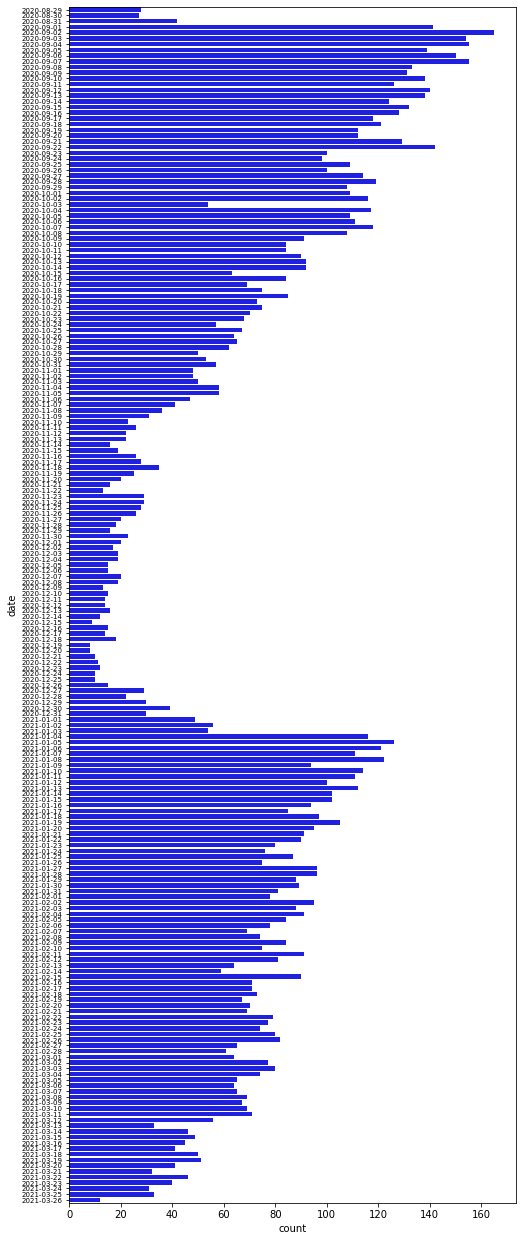

In [108]:
# visualization 
f, ax = plt.subplots(figsize=(8, 22))
sns.barplot(y=countTweetsDay.index, x= countTweetsDay['count'], color="b")
plt.yticks(fontsize=7);

### Conclusion of the visualisation
- slightly more engagement in the fisrt round than in the second
- faster decline in the first round than in the second 
- missing tweets on 03.10.2020

# ToDo
- make another query for the 03.10.2021 there are missing data

## Results
- How many total tweets?
    - 14181
- How many unique participants?
    - 779
- Basic statistics on tweets?
    - mean: 67.8
    - median: 69.0
    - max: 165
    - min: 8
- Day with most tweets / Day with least tweets
    - min tweets: 8 tweets on 19th and 20th of Decemer 2020
    - mac tweets: 2nd of September 2020, (one day after the start)
- Who was the most active user?
    - paulapivat